Posttest 5 Kecerdasan Buatan

Erick Apriansyah

2009106110

# Import Llibrary

Library yang digunakan kali ini adalah :
- pandas
- numpy
- matplotlib
- sklearn
- warnings

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("msft.csv")

df

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
...,...,...,...,...,...,...
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00
5321,NaN,NaN,948,NaN,NaN,NaN


##### Melakukan Cleaning data pada dataset 

In [42]:
df.isna().sum()

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
dtype: int64

In [43]:
sim  = SimpleImputer(strategy='mean')
simf = SimpleImputer(strategy='most_frequent')
df['Name'] = simf.fit_transform(df[['Name']])
df['Rating'] = sim.fit_transform(df[['Rating']])
df['Category'] = simf.fit_transform(df[['Category']])
df['Date'] = simf.fit_transform(df[['Date']])
df['Price'] = simf.fit_transform(df[['Price']])

df.isna().sum()

Name                  0
Rating                0
No of people Rated    0
Category              0
Date                  0
Price                 0
dtype: int64

In [44]:
df.duplicated().sum()

1

In [45]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [46]:
data = df[['No of people Rated','Rating']]
label = df['Category']

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=.3)

#### Gunakan salah satu tipe pendekatan pada Supervised Learning.

untuk pendekatan yang digunakan adalah klafikasi yang dimana akan menggunakan algoritma ***decision tree,Gaussian Naive Bayes,K-Nearest Neighbor***.

#### Klasifikasi

#### Gunakan minimal 2 algoritma untuk membandingkan score/hasil terbaiknya.

##### Decision Tree


In [47]:
dt = DecisionTreeClassifier()
dt.fit(data_train, label_train)

DecisionTreeClassifier()

In [48]:
predict_label = dt.predict(data_test)
accuracy = accuracy_score(label_test, predict_label)

print("Akurasi algoritma Decision Tree :", accuracy)

Akurasi algoritma Decision Tree : 0.11772072636192861


##### Naive Bayes

In [49]:
gnb  = GaussianNB()
gnb.fit(data_train,label_train)

GaussianNB()

In [50]:
predict_label = gnb.predict(data_test)
accuracy = accuracy_score(label_test, predict_label)

print("Akurasi algoritma Naive Bayes :", accuracy)

Akurasi algoritma Naive Bayes : 0.16718847839699436


#####  K-Nearest Neighbors (KNN)

In [51]:
knn = KNeighborsClassifier()
knn.fit(data_train,label_train)

KNeighborsClassifier()

In [52]:
predict_label = knn.predict(data_test)
accuracy = accuracy_score(label_test, predict_label)

print("Akurasi algoritma K-Nearest Neighbors :", accuracy)

Akurasi algoritma K-Nearest Neighbors : 0.1208515967438948


### Tampilkan score dari model-model tersebut untuk classification

In [53]:
knn.score(data_test,label_test)

0.1208515967438948

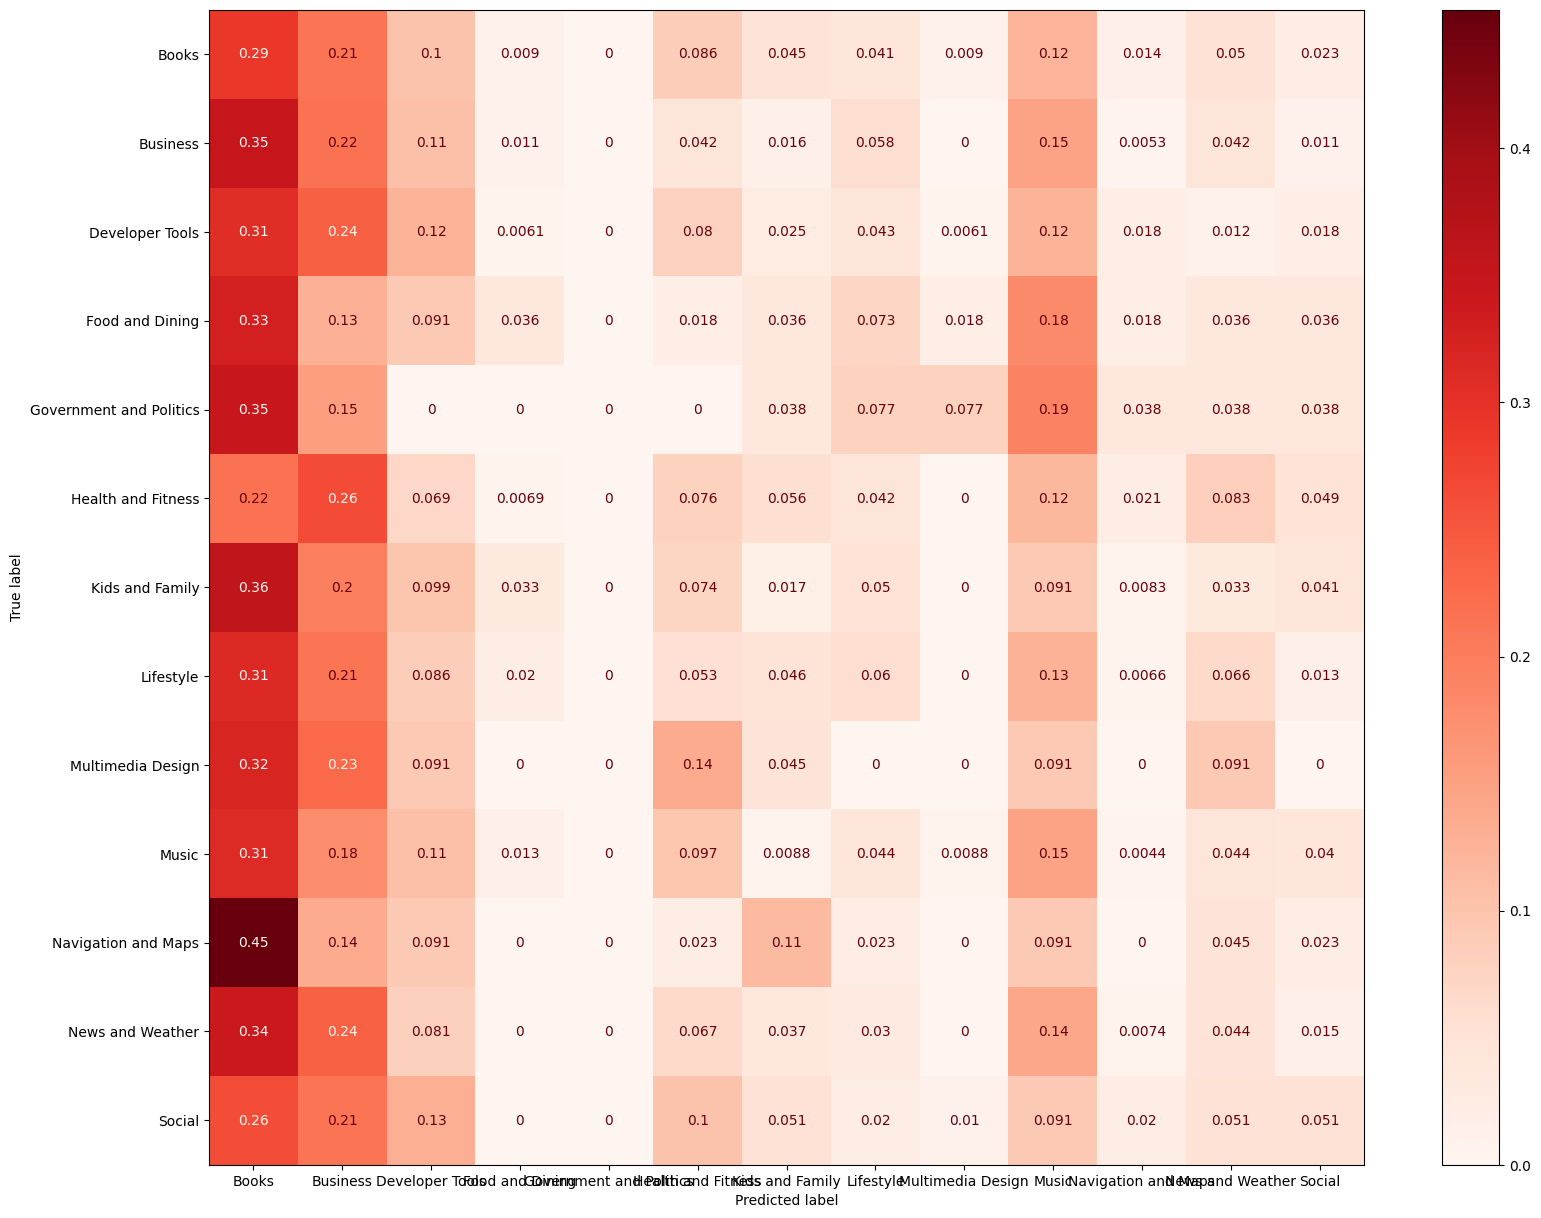

In [54]:
fig, ax = plt.subplots(figsize=(20, 15))
plot_confusion_matrix(knn, data_test, label_test, cmap='Reds',ax=ax, normalize='true')
plt.show()

In [55]:
dt.score(data_test,label_test)

0.11772072636192861

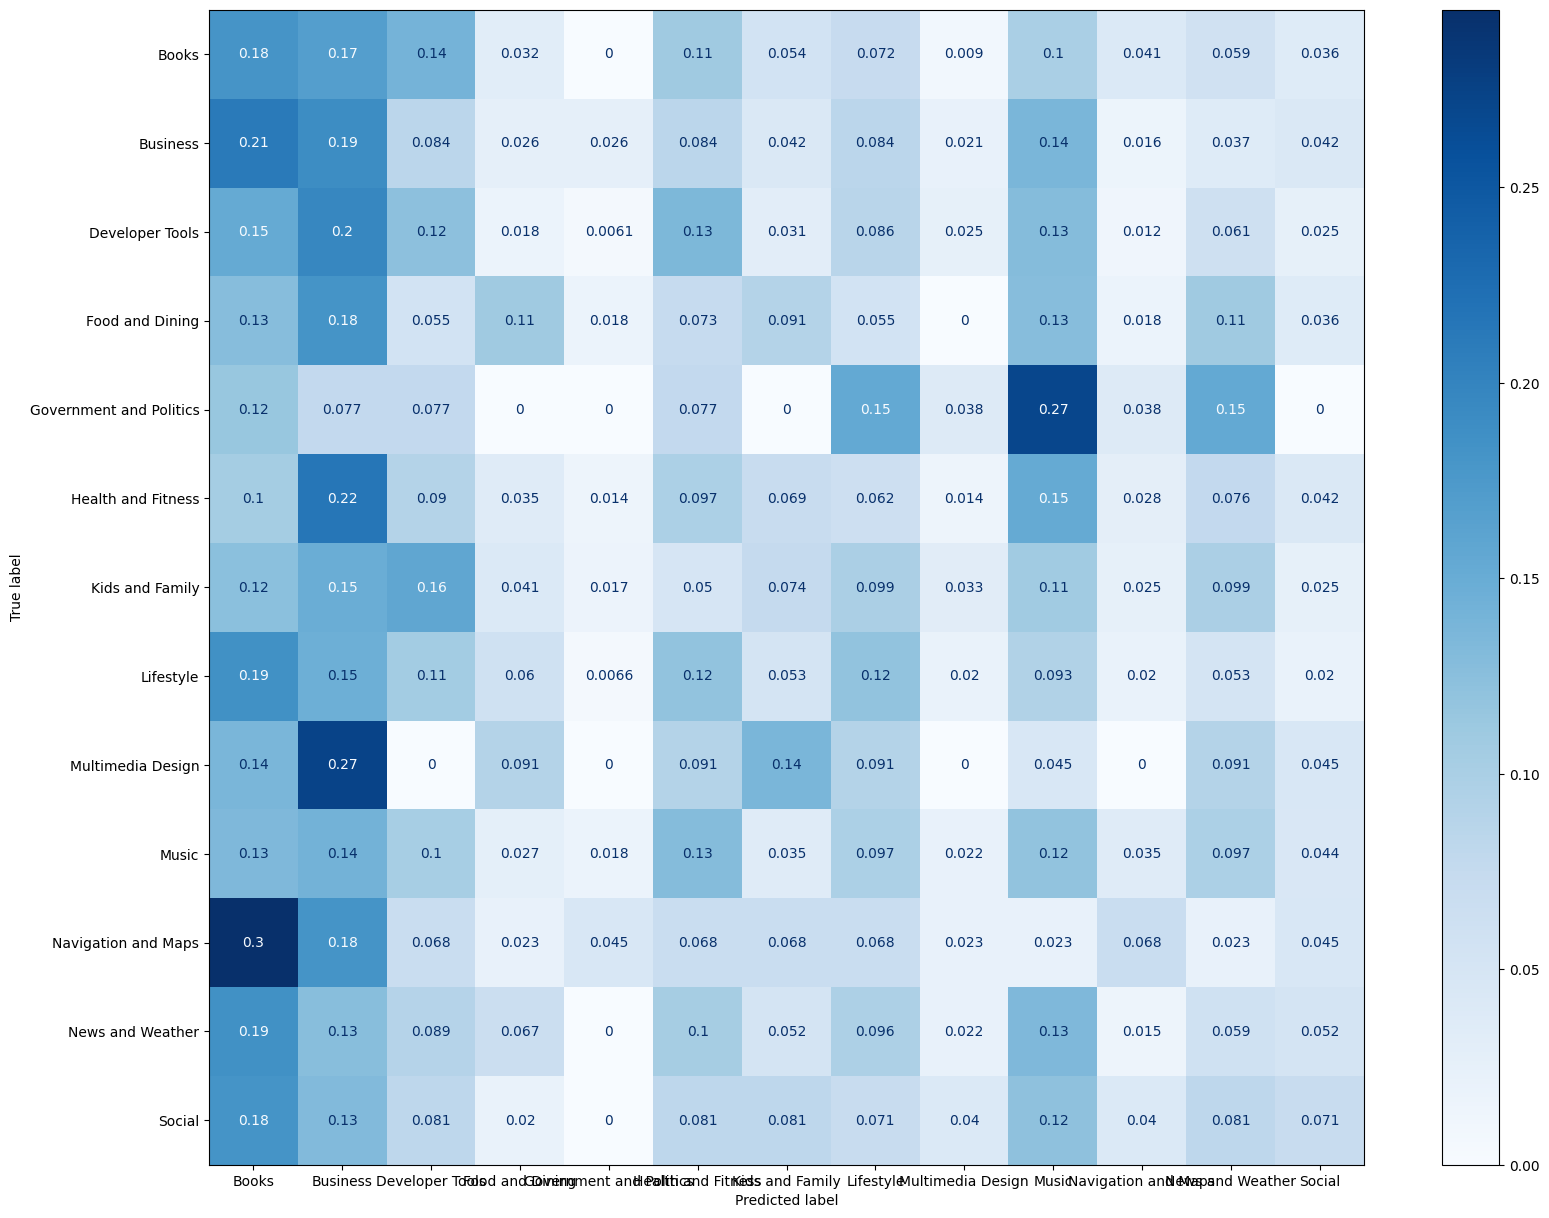

In [56]:
fig, ax = plt.subplots(figsize=(20, 15))
plot_confusion_matrix(dt, data_test, label_test, cmap='Blues',ax=ax, normalize='true')
plt.show()

In [57]:
gnb.score(data_test,label_test)

0.16718847839699436

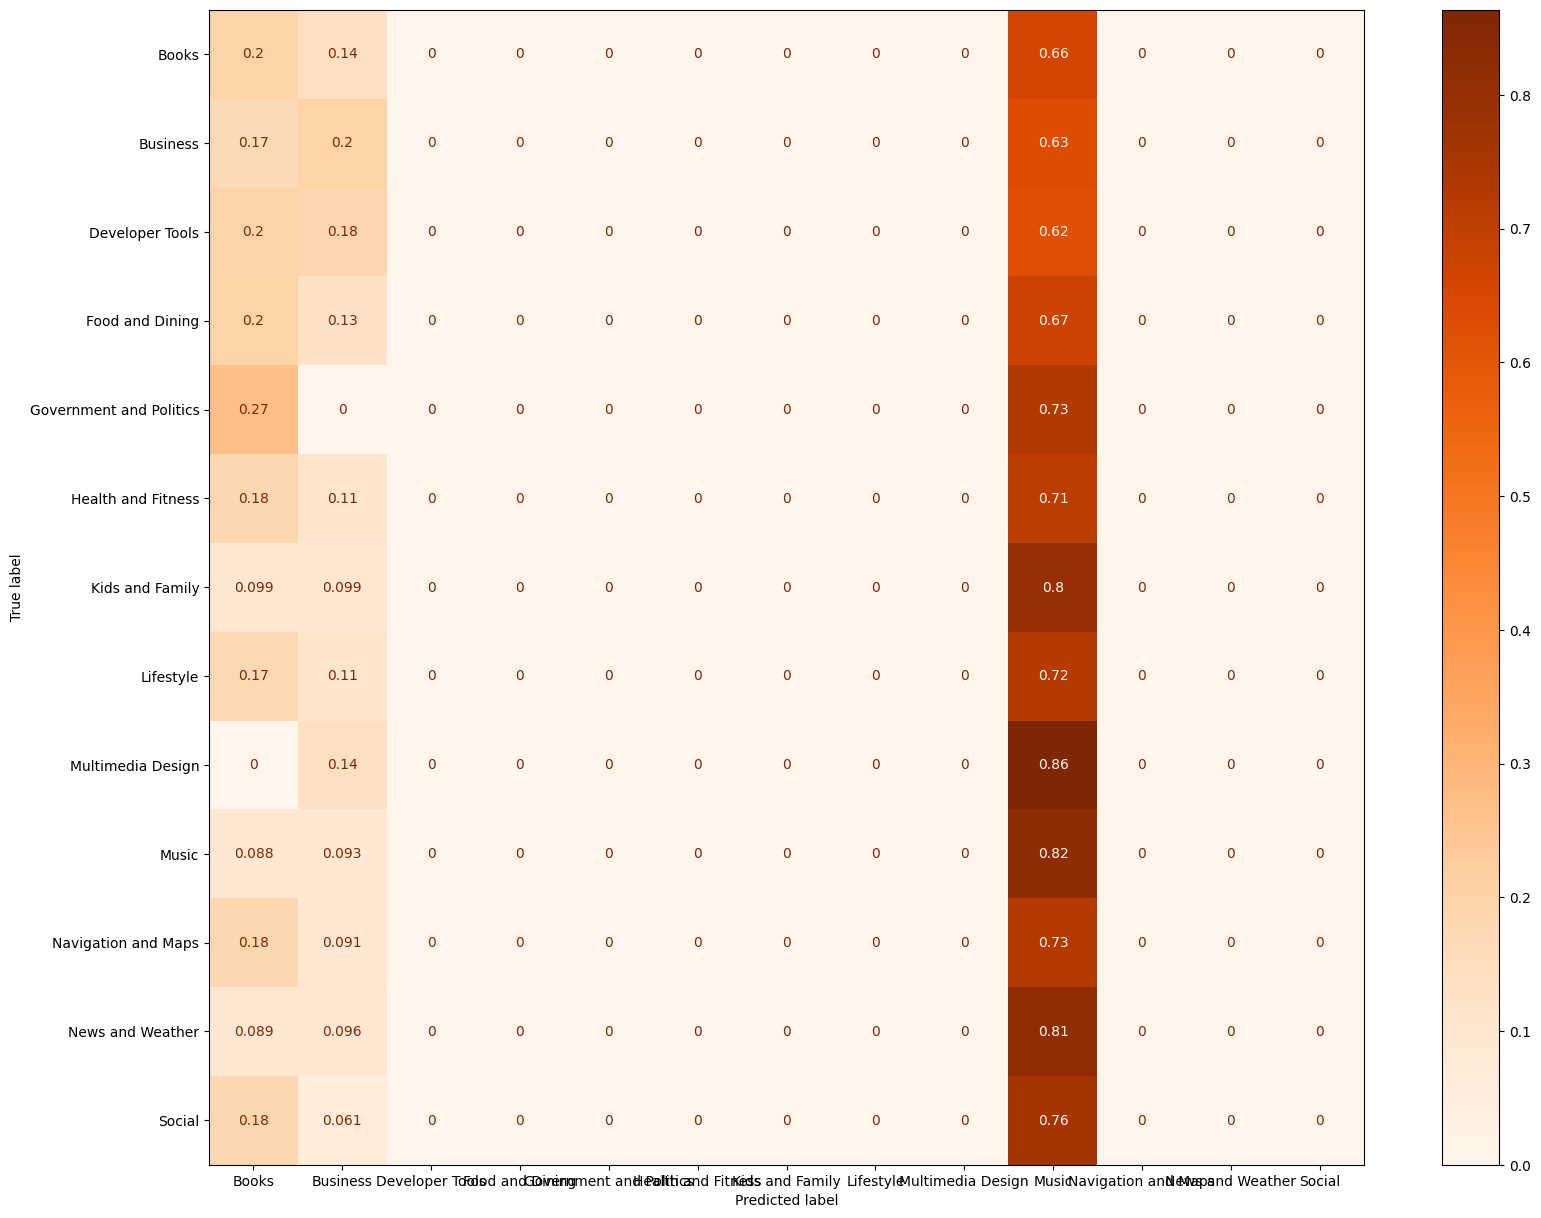

In [58]:

fig, ax = plt.subplots(figsize=(20, 15))
plot_confusion_matrix(gnb, data_test, label_test, cmap='Oranges',ax=ax, normalize='true')
plt.show()